In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('heart.csv')

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
X = df.drop('target',axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegressionCV

In [58]:
model = LogisticRegressionCV()

In [59]:
model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

LogisticRegressionCV()

In [60]:
model.C_

array([0.35938137])

In [61]:
y_pred = model.predict(X_test)

In [64]:
model.coef_

array([[ 0.00218846, -1.20546735,  0.73814407, -0.0143884 , -0.00284648,
         0.0855239 ,  0.43205895,  0.02639376, -0.68288891, -0.46461915,
         0.49474056, -0.67639525, -0.58477047]])

**Model performance for classification**

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [66]:
y_pred = model.predict(scaled_X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.9032258064516129

In [68]:
confusion_matrix(y_test,y_pred)

array([[14,  1],
       [ 2, 14]], dtype=int64)

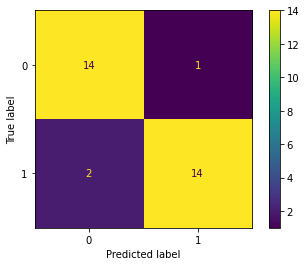

In [69]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.88      0.90        16

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



In [71]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

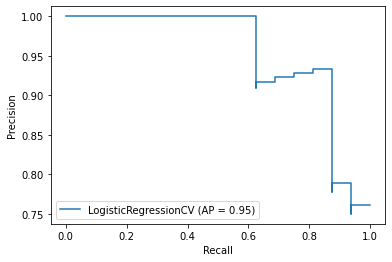

In [72]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

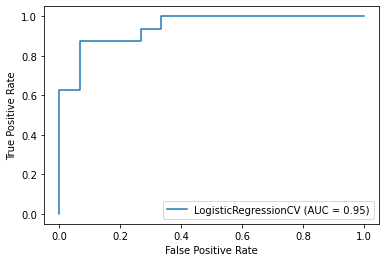

In [73]:
plot_roc_curve(model,scaled_X_test,y_test)

In [74]:
y_pred = model.predict(scaled_X_test)

In [75]:
X_test_raw = scaler.inverse_transform(scaled_X_test) #convert the scaled data

In [76]:
df_predicted=pd.DataFrame(y_pred)

In [77]:
df_predicted.rename(columns={0:'Predicted'},inplace = True)

In [78]:
df_predicted['y_test']=y_test.to_frame().reset_index()['target']

In [79]:
df_predicted

,Predicted,y_test
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [80]:
from joblib import dump, load

In [81]:
dump(model,'target3_model.h5')

['target3_model.h5']

In [82]:
dump(scaler,'target3_scaler.pkl')

['target3_scaler.pkl']

**Predicting a single blood test**

In [83]:
target_model = load("target_model.h5") #loading the trained model

In [84]:
target_scaler = load("target_scaler.pkl") #loading the scaler

In [85]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [89]:
target_example = {'age':63,
                 'sex':1,
                 'cp':3,
                 'trestbps':145,
                 'chol':233,
                 'fbs':1,
                 'restecg':0,
                 'thalach':150,
                 'exang':0,
                 'oldpeak':2.3,
                 'slope':0,
                 'ca':0,
                 'thal':1}

In [90]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    age = sample_json['age']
    sex = sample_json['sex']
    cp = sample_json['cp']
    restbp = sample_json['trestbps']
    chol = sample_json['chol']
    fbs = sample_json['fbs']
    restecg = sample_json['restecg']
    thalach = sample_json['thalach']
    exang = sample_json['exang']
    oldpeak = sample_json['oldpeak']
    slope = sample_json['slope']
    ca = sample_json['ca']
    thal = sample_json['thal']
    
    target = [[age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
    
    target = scaler.transform(target)
    
    prediction= model.predict(target)
    
    return prediction[0]

In [91]:
return_prediction(target_model,target_scaler,target_example)

1